## Importing the required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support
import joblib

## Loading the dataset

In [2]:
df = pd.read_csv('flightdata.csv')
df.head()

YEAR  QUARTER  MONTH  DAY_OF_MONTH  DAY_OF_WEEK UNIQUE_CARRIER TAIL_NUM  \
0  2016        1      1             1            5             DL   N836DN   
1  2016        1      1             1            5             DL   N964DN   
2  2016        1      1             1            5             DL   N813DN   
3  2016        1      1             1            5             DL   N587NW   
4  2016        1      1             1            5             DL   N836DN   

   FL_NUM  ORIGIN_AIRPORT_ID ORIGIN  ...  CRS_ARR_TIME ARR_TIME  ARR_DELAY  \
0    1399              10397    ATL  ...          2143   2102.0      -41.0   
1    1476              11433    DTW  ...          1435   1439.0        4.0   
2    1597              10397    ATL  ...          1215   1142.0      -33.0   
3    1768              14747    SEA  ...          1335   1345.0       10.0   
4    1823              14747    SEA  ...           607    615.0        8.0   

   ARR_DEL15  CANCELLED  DIVERTED  CRS_ELAPSED_TIME  ACTUAL_ELAPSED_TIME  \
0        0.0        0.0       0.0             338.0                295.0   
1        0.0        0.0       0.0             110.0                115.0   
2        0.0        0.0       0.0             335.0                300.0   
3        0.0        0.0       0.0             196.0                205.0   
4        0.0        0.0       0.0             247.0                259.0   

   DISTANCE  Unnamed: 25  
0    2182.0          NaN  
1     528.0          NaN  
2    2182.0          NaN  
3    1399.0          NaN  
4    1927.0          NaN  

[5 rows x 26 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 11231 non-null  int64  
 1   QUARTER              11231 non-null  int64  
 2   MONTH                11231 non-null  int64  
 3   DAY_OF_MONTH         11231 non-null  int64  
 4   DAY_OF_WEEK          11231 non-null  int64  
 5   UNIQUE_CARRIER       11231 non-null  object 
 6   TAIL_NUM             11231 non-null  object 
 7   FL_NUM               11231 non-null  int64  
 8   ORIGIN_AIRPORT_ID    11231 non-null  int64  
 9   ORIGIN               11231 non-null  object 
 10  DEST_AIRPORT_ID      11231 non-null  int64  
 11  DEST                 11231 non-null  object 
 12  CRS_DEP_TIME         11231 non-null  int64  
 13  DEP_TIME             11124 non-null  float64
 14  DEP_DELAY            11124 non-null  float64
 15  DEP_DEL15            11124 non-null 

## Performing Univariate Analysis

### Using Pie Chart

<AxesSubplot:ylabel='YEAR'>

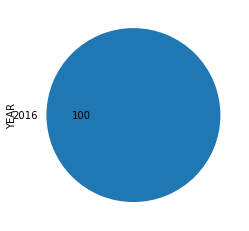

In [4]:
df['YEAR'].value_counts().plot(kind='pie', autopct='%.0f')

## Performing Bivariate Analysis

### Using scatterplot

Text(0, 0.5, 'DEP_DEL15')

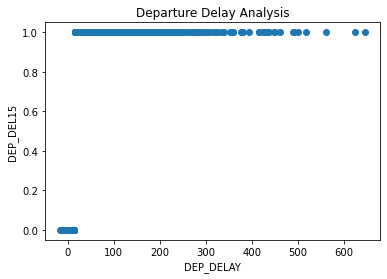

In [5]:
plt.scatter(df.DEP_DELAY, df.DEP_DEL15)
plt.title('Departure Delay Analysis')
plt.xlabel('DEP_DELAY')
plt.ylabel('DEP_DEL15')

Text(0, 0.5, 'ARR_DEL15')

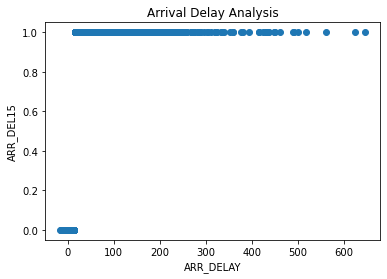

In [6]:
plt.scatter(df.DEP_DELAY, df.DEP_DEL15)
plt.title('Arrival Delay Analysis')
plt.xlabel('ARR_DELAY')
plt.ylabel('ARR_DEL15')

### Using lineplots

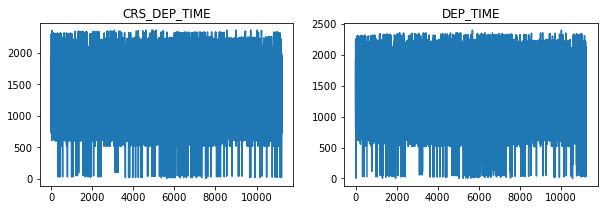

In [7]:
fig, ax = plt.subplots(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.title('CRS_DEP_TIME')
plt.plot(df.CRS_DEP_TIME)
plt.subplot(1, 2, 2)
plt.title('DEP_TIME')
plt.plot(df.DEP_TIME)

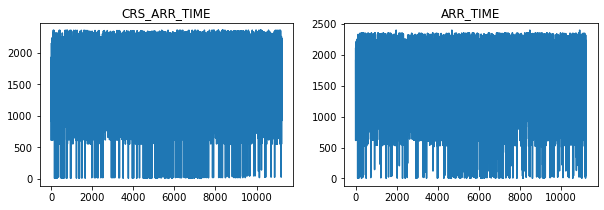

In [8]:
fig, ax = plt.subplots(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.title('CRS_ARR_TIME')
plt.plot(df.CRS_ARR_TIME)
plt.subplot(1, 2, 2)
plt.title('ARR_TIME')
plt.plot(df.ARR_TIME)

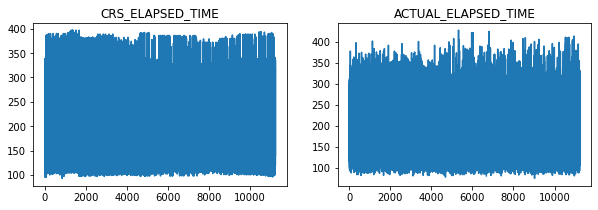

In [9]:
fig, ax = plt.subplots(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.title('CRS_ELAPSED_TIME')
plt.plot(df.CRS_ELAPSED_TIME)
plt.subplot(1, 2, 2)
plt.title('ACTUAL_ELAPSED_TIME')
plt.plot(df.ACTUAL_ELAPSED_TIME)

## Performing Multivariate Analysis

### Using pairplot

In [10]:
#sb.pairplot(df.iloc[:, 12:])

### Using heatmap

<AxesSubplot:>

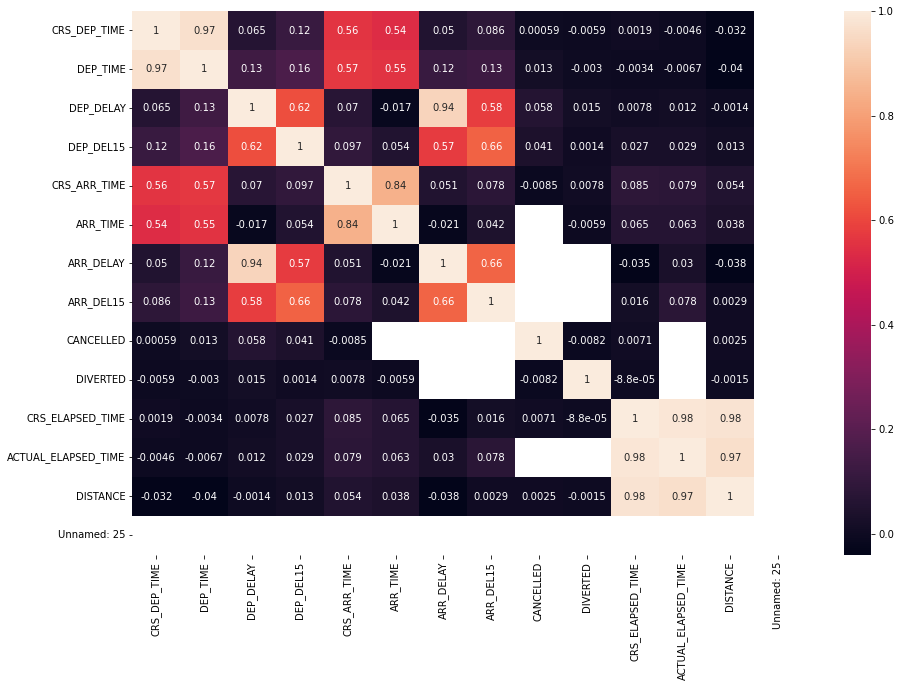

In [11]:
fig, ax = plt.subplots(figsize=(15, 10))
sb.heatmap(df.iloc[:, 12:].corr(), annot=True, ax=ax)

## Performing Descriptive Analysis

In [12]:
df.describe()

YEAR       QUARTER         MONTH  DAY_OF_MONTH   DAY_OF_WEEK  \
count  11231.0  11231.000000  11231.000000  11231.000000  11231.000000   
mean    2016.0      2.544475      6.628973     15.790758      3.960199   
std        0.0      1.090701      3.354678      8.782056      1.995257   
min     2016.0      1.000000      1.000000      1.000000      1.000000   
25%     2016.0      2.000000      4.000000      8.000000      2.000000   
50%     2016.0      3.000000      7.000000     16.000000      4.000000   
75%     2016.0      3.000000      9.000000     23.000000      6.000000   
max     2016.0      4.000000     12.000000     31.000000      7.000000   

             FL_NUM  ORIGIN_AIRPORT_ID  DEST_AIRPORT_ID  CRS_DEP_TIME  \
count  11231.000000       11231.000000     11231.000000  11231.000000   
mean    1334.325617       12334.516695     12302.274508   1320.798326   
std      811.875227        1595.026510      1601.988550    490.737845   
min        7.000000       10397.000000     10397.000000     10.000000   
25%      624.000000       10397.000000     10397.000000    905.000000   
50%     1267.000000       12478.000000     12478.000000   1320.000000   
75%     2032.000000       13487.000000     13487.000000   1735.000000   
max     2853.000000       14747.000000     14747.000000   2359.000000   

           DEP_TIME  ...  CRS_ARR_TIME      ARR_TIME     ARR_DELAY  \
count  11124.000000  ...  11231.000000  11116.000000  11043.000000   
mean    1327.189410  ...   1537.312795   1523.978499     -2.573123   
std      500.306462  ...    502.512494    512.536041     39.232521   
min        1.000000  ...      2.000000      1.000000    -67.000000   
25%      905.000000  ...   1130.000000   1135.000000    -19.000000   
50%     1324.000000  ...   1559.000000   1547.000000    -10.000000   
75%     1739.000000  ...   1952.000000   1945.000000      1.000000   
max     2400.000000  ...   2359.000000   2400.000000    615.000000   

          ARR_DEL15     CANCELLED      DIVERTED  CRS_ELAPSED_TIME  \
count  11043.000000  11231.000000  11231.000000      11231.000000   
mean       0.124513      0.010150      0.006589        190.652124   
std        0.330181      0.100241      0.080908         78.386317   
min        0.000000      0.000000      0.000000         93.000000   
25%        0.000000      0.000000      0.000000        127.000000   
50%        0.000000      0.000000      0.000000        159.000000   
75%        0.000000      0.000000      0.000000        255.000000   
max        1.000000      1.000000      1.000000        397.000000   

       ACTUAL_ELAPSED_TIME      DISTANCE  Unnamed: 25  
count         11043.000000  11231.000000          0.0  
mean            179.661233   1161.031965          NaN  
std              77.940399    643.683379          NaN  
min              75.000000    509.000000          NaN  
25%             117.000000    594.000000          NaN  
50%             149.000000    907.000000          NaN  
75%             236.000000   1927.000000          NaN  
max             428.000000   2422.000000          NaN  

[8 rows x 22 columns]

## Dropping unnecessary columns

In [13]:
df = df[['FL_NUM', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'ORIGIN', 'DEST', 'CRS_ARR_TIME', 'DEP_DEL15', 'ARR_DEL15']]
df.head()

FL_NUM  MONTH  DAY_OF_MONTH  DAY_OF_WEEK ORIGIN DEST  CRS_ARR_TIME  \
0    1399      1             1            5    ATL  SEA          2143   
1    1476      1             1            5    DTW  MSP          1435   
2    1597      1             1            5    ATL  SEA          1215   
3    1768      1             1            5    SEA  MSP          1335   
4    1823      1             1            5    SEA  DTW           607   

   DEP_DEL15  ARR_DEL15  
0        0.0        0.0  
1        0.0        0.0  
2        0.0        0.0  
3        0.0        0.0  
4        0.0        0.0

## Handling Missing Values

### Checking for null values

In [14]:
df.isnull().any()

FL_NUM          False
MONTH           False
DAY_OF_MONTH    False
DAY_OF_WEEK     False
ORIGIN          False
DEST            False
CRS_ARR_TIME    False
DEP_DEL15        True
ARR_DEL15        True
dtype: bool

### Replacing null values

In [15]:
df.fillna(df['DEP_DEL15'].mode()[0], inplace=True)
df.fillna(df['ARR_DEL15'].mode()[0], inplace=True)

### Checking if the replacement is made

In [16]:
df.isnull().any()

FL_NUM          False
MONTH           False
DAY_OF_MONTH    False
DAY_OF_WEEK     False
ORIGIN          False
DEST            False
CRS_ARR_TIME    False
DEP_DEL15       False
ARR_DEL15       False
dtype: bool

## Handling Outliers

<AxesSubplot:>

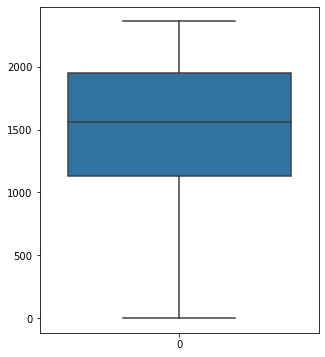

In [17]:
fig, ax = plt.subplots(figsize=(5, 6))
sb.boxplot(data=df['CRS_ARR_TIME'])

There are no outliers

## Encoding

### One Hot Encoding

In [18]:
df = pd.get_dummies(df, columns=['ORIGIN', 'DEST'])
df.head()

FL_NUM  MONTH  DAY_OF_MONTH  DAY_OF_WEEK  CRS_ARR_TIME  DEP_DEL15  \
0    1399      1             1            5          2143        0.0   
1    1476      1             1            5          1435        0.0   
2    1597      1             1            5          1215        0.0   
3    1768      1             1            5          1335        0.0   
4    1823      1             1            5           607        0.0   

   ARR_DEL15  ORIGIN_ATL  ORIGIN_DTW  ORIGIN_JFK  ORIGIN_MSP  ORIGIN_SEA  \
0        0.0           1           0           0           0           0   
1        0.0           0           1           0           0           0   
2        0.0           1           0           0           0           0   
3        0.0           0           0           0           0           1   
4        0.0           0           0           0           0           1   

   DEST_ATL  DEST_DTW  DEST_JFK  DEST_MSP  DEST_SEA  
0         0         0         0         0         1  
1         0         0         0         1         0  
2         0         0         0         0         1  
3         0         0         0         1         0  
4         0         1         0         0         0

In [19]:
df.columns

Index(['FL_NUM', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'CRS_ARR_TIME',
       'DEP_DEL15', 'ARR_DEL15', 'ORIGIN_ATL', 'ORIGIN_DTW', 'ORIGIN_JFK',
       'ORIGIN_MSP', 'ORIGIN_SEA', 'DEST_ATL', 'DEST_DTW', 'DEST_JFK',
       'DEST_MSP', 'DEST_SEA'],
      dtype='object')

## Splitting dataset into Independent and Dependent Variables

In [20]:
X = df.drop(columns=['ARR_DEL15'])
Y = df[['ARR_DEL15']]

## Scaling the Independent Variables

In [21]:
X = pd.DataFrame(scale(X), columns=X.columns)
X.head()

FL_NUM     MONTH  DAY_OF_MONTH  DAY_OF_WEEK  CRS_ARR_TIME  DEP_DEL15  \
0  0.079664 -1.678022     -1.684277     0.521159      1.205371  -0.405955   
1  0.174510 -1.678022     -1.684277     0.521159     -0.203612  -0.405955   
2  0.323555 -1.678022     -1.684277     0.521159     -0.641431  -0.405955   
3  0.534188 -1.678022     -1.684277     0.521159     -0.402620  -0.405955   
4  0.601935 -1.678022     -1.684277     0.521159     -1.851405  -0.405955   

   ORIGIN_ATL  ORIGIN_DTW  ORIGIN_JFK  ORIGIN_MSP  ORIGIN_SEA  DEST_ATL  \
0    1.619538   -0.493703   -0.373354   -0.540332   -0.468015 -0.634131   
1   -0.617460    2.025507   -0.373354   -0.540332   -0.468015 -0.634131   
2    1.619538   -0.493703   -0.373354   -0.540332   -0.468015 -0.634131   
3   -0.617460   -0.493703   -0.373354   -0.540332    2.136682 -0.634131   
4   -0.617460   -0.493703   -0.373354   -0.540332    2.136682 -0.634131   

   DEST_DTW  DEST_JFK  DEST_MSP  DEST_SEA  
0 -0.495098 -0.363691 -0.534140  2.152300  
1 -0.495098 -0.363691  1.872168 -0.464619  
2 -0.495098 -0.363691 -0.534140  2.152300  
3 -0.495098 -0.363691  1.872168 -0.464619  
4  2.019802 -0.363691 -0.534140 -0.464619

## Converting the Independent and Dependent Variables to 1D Arrays

In [22]:
X = X.values
Y = Y.values

## Splitting dataset into Train and Test datasets

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [24]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((8984, 16), (2247, 16), (8984, 1), (2247, 1))

## Building the Machine Learning Models

### Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train.ravel())

LogisticRegression()

### Support Vector Machine (Classifier)

In [26]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, Y_train.ravel())

SVC()

### KNN Classifier

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train.ravel())

KNeighborsClassifier()

### Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=15, max_depth=3)
rf.fit(X_train, Y_train.ravel())

RandomForestClassifier(max_depth=3, n_estimators=15)

## Testing the Models

### Logistic Regression

In [29]:
Y_pred_log_train = log_reg.predict(X_train)
Y_pred_log_test = log_reg.predict(X_test)

In [30]:
pd.DataFrame(Y_pred_log_train).value_counts()

0.0    7756
1.0    1228
dtype: int64

In [31]:
pd.DataFrame(Y_pred_log_test).value_counts()

0.0    1944
1.0     303
dtype: int64

### Support Vector Machine (Classifier)

In [32]:
Y_pred_svc_train = svc.predict(X_train)
Y_pred_svc_test = svc.predict(X_test)

In [33]:
pd.DataFrame(Y_pred_svc_train).value_counts()

0.0    7761
1.0    1223
dtype: int64

In [34]:
pd.DataFrame(Y_pred_svc_test).value_counts()

0.0    1948
1.0     299
dtype: int64

### KNN Classifier

In [35]:
Y_pred_knn_train = knn.predict(X_train)
Y_pred_knn_test = knn.predict(X_test)

In [36]:
pd.DataFrame(Y_pred_knn_train).value_counts()

0.0    8017
1.0     967
dtype: int64

In [37]:
pd.DataFrame(Y_pred_knn_test).value_counts()

0.0    2004
1.0     243
dtype: int64

### Random Forest Classifier

In [38]:
Y_pred_rf_train = rf.predict(X_train)
Y_pred_rf_test = rf.predict(X_test)

In [39]:
pd.DataFrame(Y_pred_rf_train).value_counts()

0.0    8981
1.0       3
dtype: int64

In [40]:
pd.DataFrame(Y_pred_rf_test).value_counts()

0.0    2246
1.0       1
dtype: int64

## Evaluating the ML Models using Metrics

### Logistic Regression

##### Classification Report

In [41]:
print(classification_report(Y_test, Y_pred_log_test))

              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95      1976
         1.0       0.65      0.73      0.69       271

    accuracy                           0.92      2247
   macro avg       0.81      0.84      0.82      2247
weighted avg       0.93      0.92      0.92      2247



##### Accuracy, Precision, Recall, F1 Score

In [42]:
acc_log = accuracy_score(Y_test, Y_pred_log_test)
prec_log, rec_log, f1_log, sup_log = precision_recall_fscore_support(Y_test, Y_pred_log_test)
print('Accuracy Score =', acc_log)
print('Precision =', prec_log[0])
print('Recall =', rec_log[0])
print('F1 Score =', f1_log[0])

Accuracy Score = 0.9207832665776591
Precision = 0.9624485596707819
Recall = 0.9468623481781376
F1 Score = 0.9545918367346938


##### Checking for Overfitting and Underfitting

In [43]:
log_train_acc = accuracy_score(Y_train, Y_pred_log_train)
log_test_acc = accuracy_score(Y_test, Y_pred_log_test)
print('Training Accuracy =', log_train_acc)
print('Testing Accuracy =', log_test_acc)

Training Accuracy = 0.9207479964381122
Testing Accuracy = 0.9207832665776591


<p><b>There is no big variation in the training and testing accuracy. Therefore, the Logistic Regression model is not overfit or underfit.</b></p>

##### Confusion Matrix

In [44]:
pd.crosstab(Y_test.ravel(), Y_pred_log_test)

col_0   0.0  1.0
row_0           
0.0    1871  105
1.0      73  198

### Support Vector Machine (Classifier)

##### Classification Report

In [45]:
print(classification_report(Y_test, Y_pred_svc_test))

              precision    recall  f1-score   support

         0.0       0.96      0.95      0.96      1976
         1.0       0.66      0.73      0.69       271

    accuracy                           0.92      2247
   macro avg       0.81      0.84      0.82      2247
weighted avg       0.93      0.92      0.92      2247



##### Accuracy, Precision, Recall, F1 Score

In [46]:
acc_svc = accuracy_score(Y_test, Y_pred_svc_test)
prec_svc, rec_svc, f1_svc, sup_svc = precision_recall_fscore_support(Y_test, Y_pred_svc_test)
print('Accuracy Score =', acc_svc)
print('Recall =', rec_svc[0])
print('F1 Score =', f1_svc[0])

Accuracy Score = 0.9216733422340899
Recall = 0.9483805668016194
F1 Score = 0.9551478083588174


##### Checking for Overfitting and Underfitting

In [47]:
svc_train_acc = accuracy_score(Y_train, Y_pred_svc_train)
svc_test_acc = accuracy_score(Y_test, Y_pred_svc_test)
print('Training Accuracy =', svc_train_acc)
print('Testing Accuracy =', svc_test_acc)

Training Accuracy = 0.9246438112199465
Testing Accuracy = 0.9216733422340899


<p><b>There is no big variation in the training and testing accuracy. Therefore, the Support Vector Classifier model is not overfit or underfit.</b></p>

##### Confusion Matrix

In [48]:
pd.crosstab(Y_test.ravel(), Y_pred_svc_test)

col_0   0.0  1.0
row_0           
0.0    1874  102
1.0      74  197

### KNN Classifier

##### Classification Report

In [49]:
print(classification_report(Y_test, Y_pred_knn_test))

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95      1976
         1.0       0.67      0.60      0.63       271

    accuracy                           0.92      2247
   macro avg       0.81      0.78      0.79      2247
weighted avg       0.91      0.92      0.91      2247



##### Accuracy, Precision, Recall, F1 Score

In [50]:
acc_knn = accuracy_score(Y_test, Y_pred_knn_test)
prec_knn, rec_knn, f1_knn, sup_knn = precision_recall_fscore_support(Y_test, Y_pred_knn_test)
print('Accuracy Score =', acc_knn)
print('Precision =', prec_knn[0])
print('Recall =', rec_knn[0])
print('F1 Score =', f1_knn[0])

Accuracy Score = 0.9154428126390743
Precision = 0.9456087824351297
Recall = 0.9590080971659919
F1 Score = 0.9522613065326633


##### Checking for Overfitting and Underfitting

In [51]:
knn_train_acc = accuracy_score(Y_train, Y_pred_knn_train)
knn_test_acc = accuracy_score(Y_test, Y_pred_knn_test)
print('Training Accuracy =', knn_train_acc)
print('Testing Accuracy =', knn_test_acc)

Training Accuracy = 0.9346616206589492
Testing Accuracy = 0.9154428126390743


<p><b>There is no big variation in the training and testing accuracy. Therefore, the KNN Classifier model is not overfit or underfit.</b></p>

##### Confusion Matrix

In [52]:
pd.crosstab(Y_test.ravel(), Y_pred_knn_test)

col_0   0.0  1.0
row_0           
0.0    1895   81
1.0     109  162

### Random Forest Classifier

##### Classification Report

In [53]:
print(classification_report(Y_test, Y_pred_rf_test))

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94      1976
         1.0       1.00      0.00      0.01       271

    accuracy                           0.88      2247
   macro avg       0.94      0.50      0.47      2247
weighted avg       0.89      0.88      0.82      2247



##### Accuracy, Precision, Recall, F1 Score

In [54]:
acc_rf = accuracy_score(Y_test, Y_pred_rf_test)
prec_rf, rec_rf, f1_rf, sup_rf = precision_recall_fscore_support(Y_test, Y_pred_rf_test)
print('Accuracy Score =', acc_rf)
print('Precision =', prec_rf[0])
print('Recall =', rec_rf[0])
print('F1 Score =', f1_rf[0])

Accuracy Score = 0.8798397863818425
Precision = 0.8797862867319679
Recall = 1.0
F1 Score = 0.9360492657508289


##### Checking for Overfitting and Underfitting

In [55]:
rf_train_acc = accuracy_score(Y_train, Y_pred_rf_train)
rf_test_acc = accuracy_score(Y_test, Y_pred_rf_test)
print('Training Accuracy =', rf_train_acc)
print('Testing Accuracy =', rf_test_acc)

Training Accuracy = 0.8774487978628673
Testing Accuracy = 0.8798397863818425


<p><b>There is no big variation in the training and testing accuracy. Therefore, the Random Forest Classifier model is not overfit or underfit.</b></p>

##### Confusion Matrix

In [56]:
pd.crosstab(Y_test.ravel(), Y_pred_rf_test)

col_0   0.0  1.0
row_0           
0.0    1976    0
1.0     270    1

<h3 style="font-style:italic"> On comparing the four models built, based on the performance metrics it is clear that Support Vector Classifier gives the highest performance. Hence, that model is chosen for deployment </h3>

## Dumping the Chosen Model into pkl file

In [57]:
joblib.dump(svc, 'model.pkl')

['model.pkl']